In [6]:
!pip install folktables
!pip install matplotlib seaborn



In [4]:
import pandas as pd

# Define the file path
file_path = r"adult_reconstruction.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   hours-per-week  age  capital-gain  capital-loss workclass     education  \
0              20   40             0             0   Private     Bachelors   
1              40   21             0             0   Private  Some-college   
2              10   17             0             0   Private          11th   
3              50   51             0             0   Private       HS-grad   
4              38   28             0             0   Private     Bachelors   

   education-num      marital-status   relationship                race  \
0             13  Married-civ-spouse           Wife               White   
1             10            Divorced      Own-child               White   
2              7       Never-married      Own-child               White   
3              9  Married-civ-spouse        Husband  Asian-Pac-Islander   
4             13       Never-married  Not-in-family               White   

   gender native-country  income       occupation  
0  Female  United-States   4

In [7]:
for column in df.columns:
    print(f"\n--- {column} ---")
    print(df[column].unique())



--- hours-per-week ---
[20 40 10 50 38 99 24 45 42 30 32 60 35 52 37 36 70 12 55 15 17 80 43 65
 39  4 49 48 18 28 22 56 25 44 68  8  5 14  2 16 64 75 87 47 33 90 84 46
 13  7 19 51 41 59 21 57 27 98 54 11 34 66  6 92  3 72 58 62  9  1 26 53
 78 23 67 85 61 63 31 29 73 77 97 76 96 81 88 94 91 95 74 86 89 79 69 82]

--- age ---
[40 21 17 51 28 26 44 81 45 37 24 29 33 23 59 56 41 38 35 34 43 22 30 27
 50 48 25 46 32 62 20 53 52 39 47 18 68 57 42 36 64 19 49 54 31 61 78 70
 58 87 55 73 75 65 63 60 66 72 71 69 77 90 67 76 74 83 80 79 85 84 82 89
 88 86]

--- capital-gain ---
[    0  2354 15024 14084  7688  4064  7298  1055  4386  2176  3781  3103
  5178   594  3137  3464  6418  2885  2653  5013  3411  2597 10566  2964
  2174  4865  4787  4650 25236  3908  9386  3456  2346  6849  6767  3674
  2202  8614  1506  2907  2463  2290 99999  2635  6360  1424 20051 15020
 10520  3325  3818   114  1471 14344 27828  2829  4508  5721  2228  2329
  1639  2050 13550  4101  4416  4934  1797  6497  1086  

In [9]:
import numpy as np

df.replace('?', np.nan, inplace=True)


In [11]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49531 entries, 0 to 49530
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hours-per-week  49531 non-null  int64 
 1   age             49531 non-null  int64 
 2   capital-gain    49531 non-null  int64 
 3   capital-loss    49531 non-null  int64 
 4   workclass       46672 non-null  object
 5   education       49531 non-null  object
 6   education-num   49531 non-null  int64 
 7   marital-status  49531 non-null  object
 8   relationship    49531 non-null  object
 9   race            49531 non-null  object
 10  gender          49531 non-null  object
 11  native-country  48672 non-null  object
 12  income          49531 non-null  int64 
 13  occupation      46662 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.3+ MB
None
hours-per-week       0
age                  0
capital-gain         0
capital-loss         0
workclass         2859
education        

In [12]:
df = df.dropna()


# Exploraotry Analysis

In [13]:
print("Shape of dataset (rows, columns):", df.shape)

# 2. Column names and types
print("\nColumn names and data types:")
print(df.dtypes)

# 3. Basic statistics (numerical features only)
print("\nSummary statistics for numerical columns:")
print(df.describe())

# 4. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 5. Number of unique values per column
print("\nUnique values per column:")
print(df.nunique())

# 6. Value counts of target column (if you know one, e.g. 'income')
if 'income' in df.columns:
    print("\nTarget distribution (income):")
    print(df['income'].value_counts())

# 7. First few rows of data
print("\nFirst 5 rows:")
print(df.head())

Shape of dataset (rows, columns): (45849, 14)

Column names and data types:
hours-per-week     int64
age                int64
capital-gain       int64
capital-loss       int64
workclass         object
education         object
education-num      int64
marital-status    object
relationship      object
race              object
gender            object
native-country    object
income             int64
occupation        object
dtype: object

Summary statistics for numerical columns:
       hours-per-week           age  capital-gain  capital-loss  \
count    45849.000000  45849.000000  45849.000000  45849.000000   
mean        40.911776     38.463347   1087.190975     87.383847   
std         11.960732     13.212342   7456.650019    402.309151   
min          1.000000     17.000000      0.000000      0.000000   
25%         40.000000     28.000000      0.000000      0.000000   
50%         40.000000     37.000000      0.000000      0.000000   
75%         45.000000     47.000000      0.00000

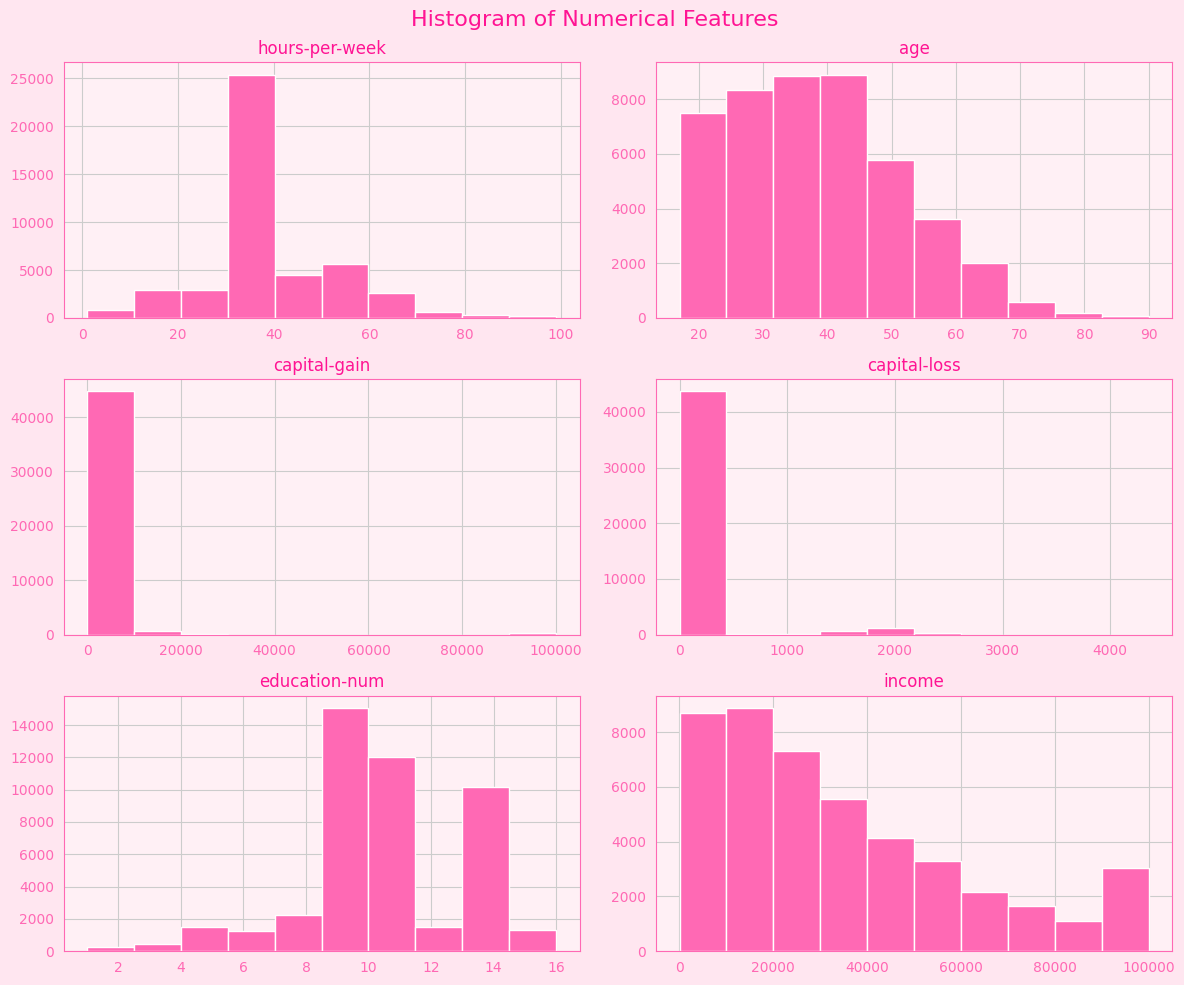

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set pink-themed style
sns.set_style("whitegrid")
sns.set_palette("pink")
plt.rcParams.update({
    'axes.facecolor': '#fff0f5',      # Light pink background
    'figure.facecolor': '#ffe6f0',    # Even lighter pink for figures
    'axes.edgecolor': '#ff69b4',      # Hot pink border
    'axes.labelcolor': '#ff1493',     # Deep pink labels
    'xtick.color': '#ff69b4',
    'ytick.color': '#ff69b4',
    'text.color': '#ff1493'
})

# Histogram for numerical features (custom color)
df.hist(figsize=(12, 10), color='#ff69b4', edgecolor='white')
plt.suptitle("Histogram of Numerical Features", fontsize=16, color='#ff1493')
plt.tight_layout()
plt.show()


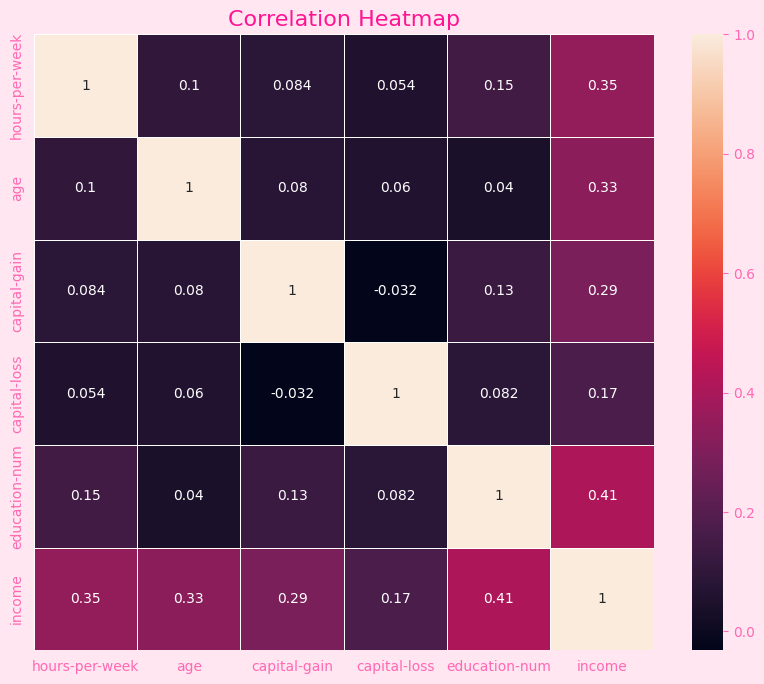

In [16]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

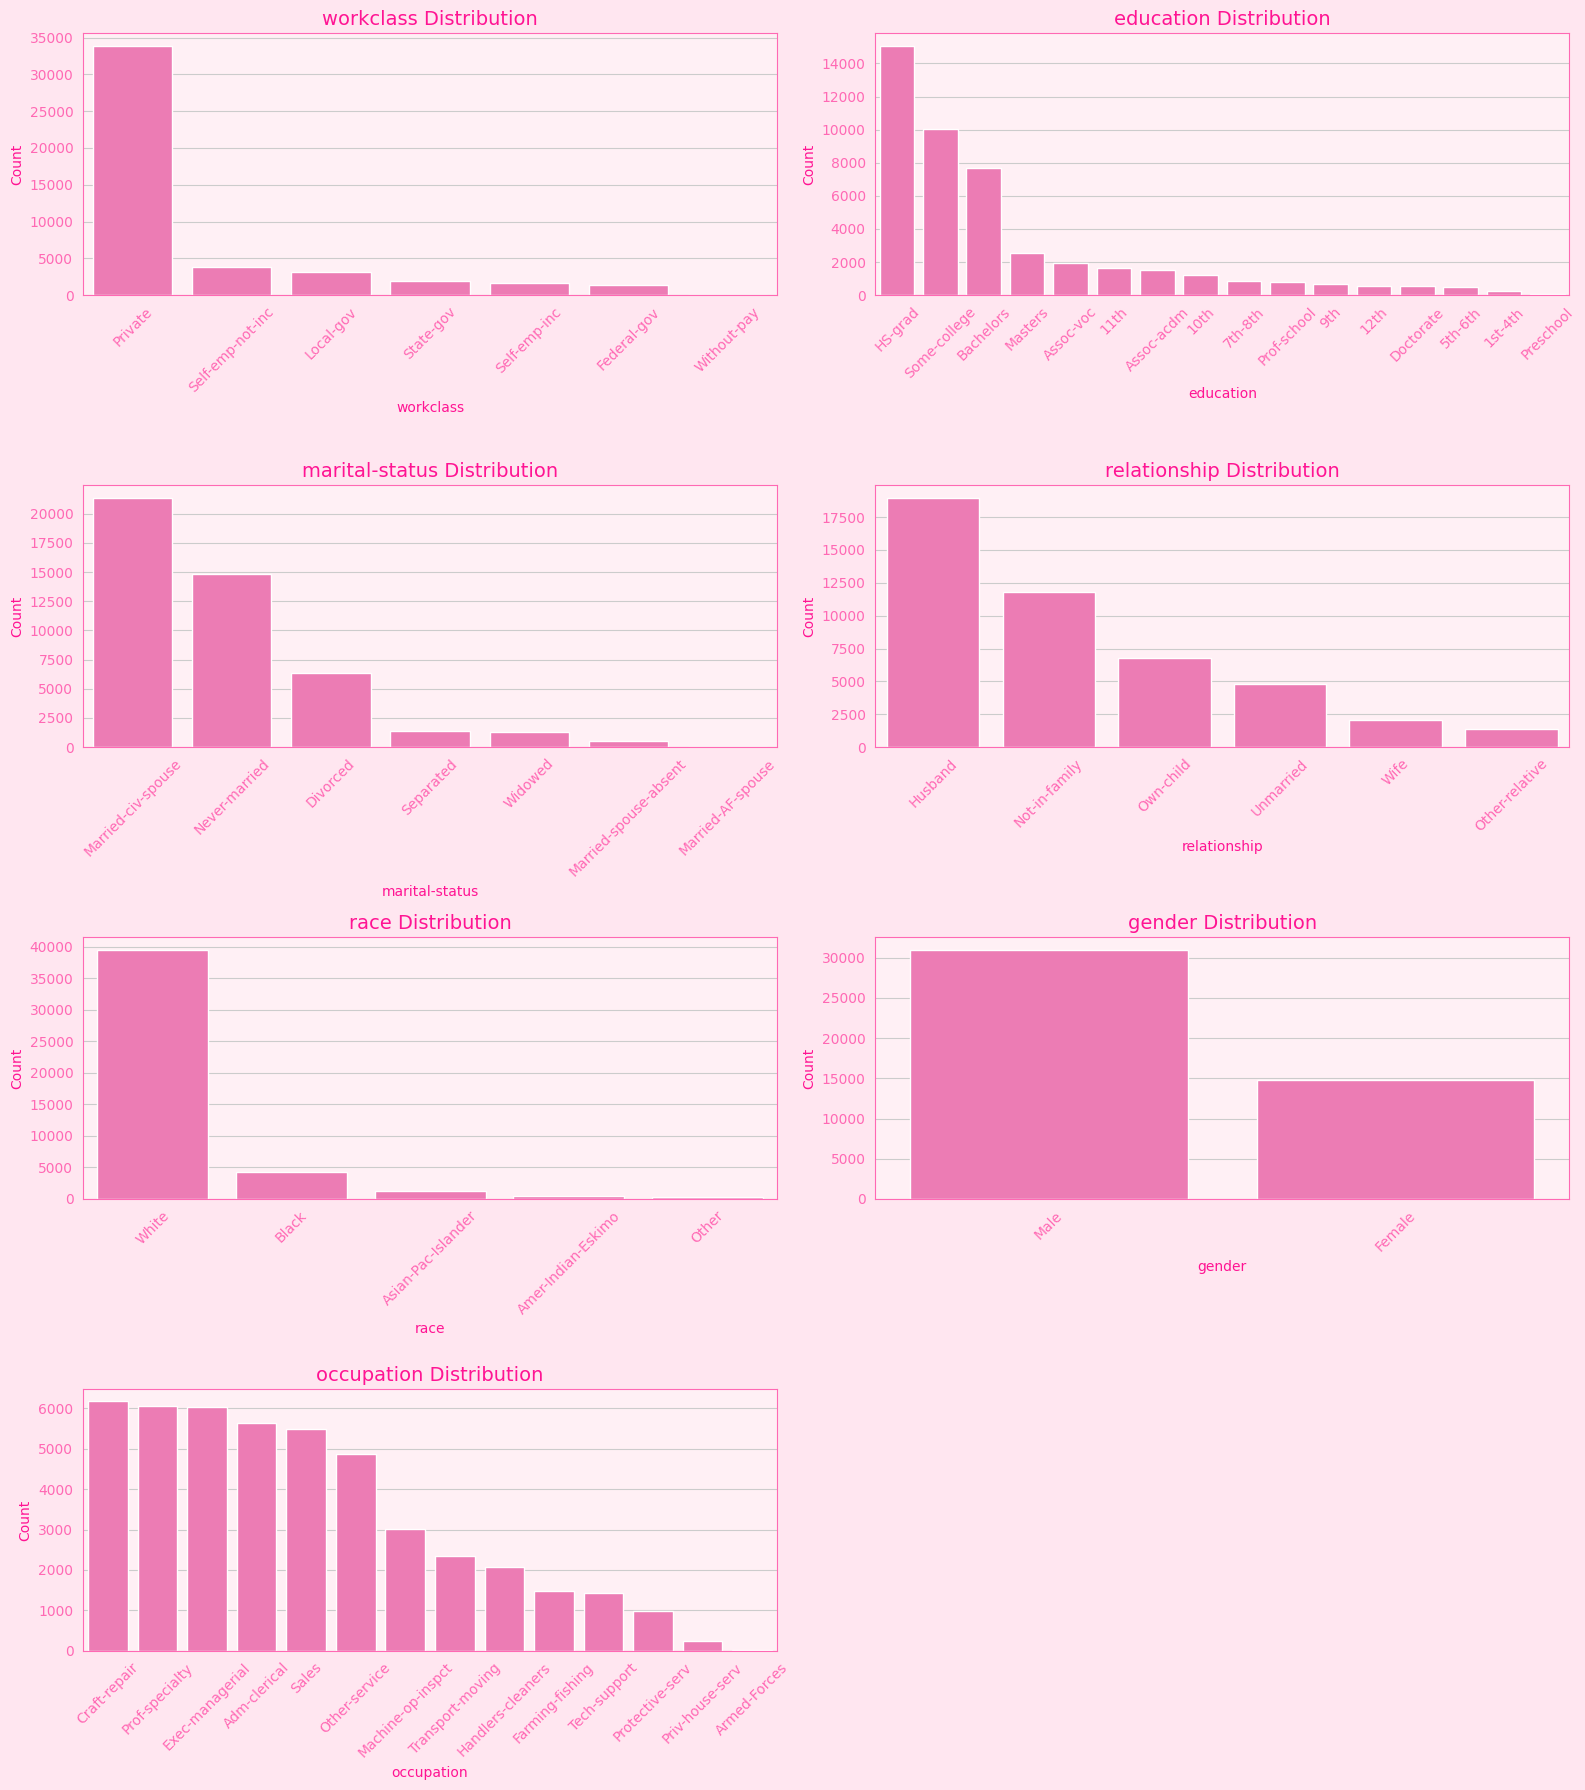

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot
cat_cols = [
    'workclass', 'education', 'marital-status', 'relationship',
    'race', 'gender', 'occupation'
]

# Set pink style
sns.set_style("whitegrid")
sns.set_palette("pink")
plt.rcParams.update({
    'axes.facecolor': '#fff0f5',
    'figure.facecolor': '#ffe6f0',
    'axes.edgecolor': '#ff69b4',
    'axes.labelcolor': '#ff1493',
    'xtick.color': '#ff69b4',
    'ytick.color': '#ff69b4',
    'text.color': '#ff1493'
})

# Set up the subplot grid: 4 rows × 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Loop through each categorical column
for idx, col in enumerate(cat_cols):
    if col in df.columns:
        sns.countplot(
            data=df,
            x=col,
            order=df[col].value_counts().index,
            color='#ff69b4',
            ax=axes[idx]
        )
        axes[idx].set_title(f'{col} Distribution', fontsize=14, color='#ff1493')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


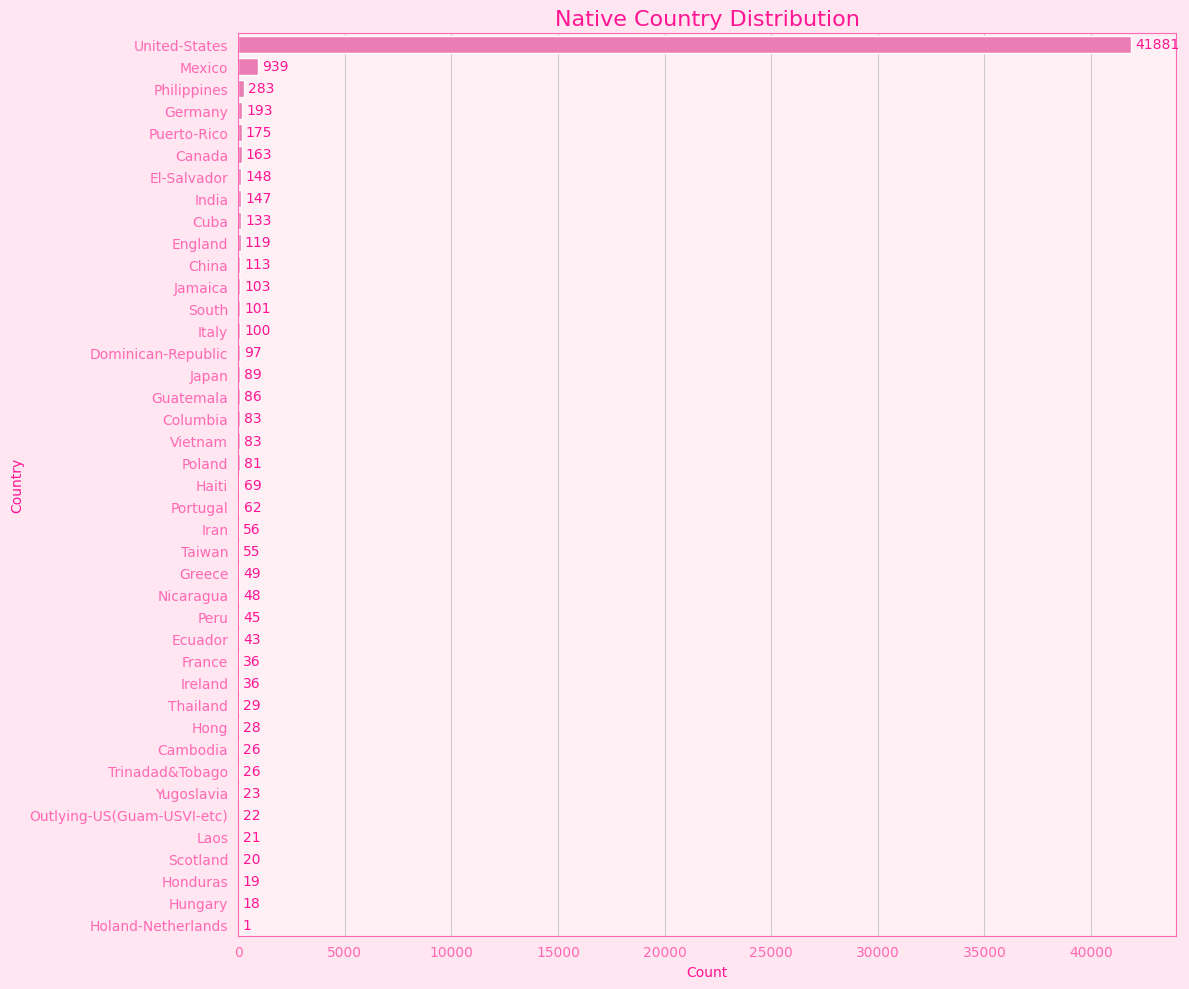

In [18]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(
    data=df,
    y='native-country',
    order=df['native-country'].value_counts().index,
    color='#ff69b4'
)

plt.title('Native Country Distribution', fontsize=16, color='#ff1493')
plt.xlabel('Count')
plt.ylabel('Country')

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


# Statistical Parity Plot

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_statistical_parity(spd_dict, title="Statistical Parity Difference by Group", figsize=(10, 6)):
    """
    Plot Statistical Parity Difference results.

    Args:
        spd_dict (dict): Dictionary where keys are group names or feature values, and values are SPD scores.
        title (str): Title for the plot.
        figsize (tuple): Size of the figure.
    """
    groups = list(spd_dict.keys())
    scores = list(spd_dict.values())

    plt.figure(figsize=figsize)
    ax = sns.barplot(x=scores, y=groups, palette='pink')
    ax.set_title(title, fontsize=14, color='#ff1493')
    ax.set_xlabel("Statistical Parity Difference")
    ax.set_ylabel("Group")

    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", padding=3)

    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()


<ipython-input-19-b0de94a86f4e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=scores, y=groups, palette='pink')


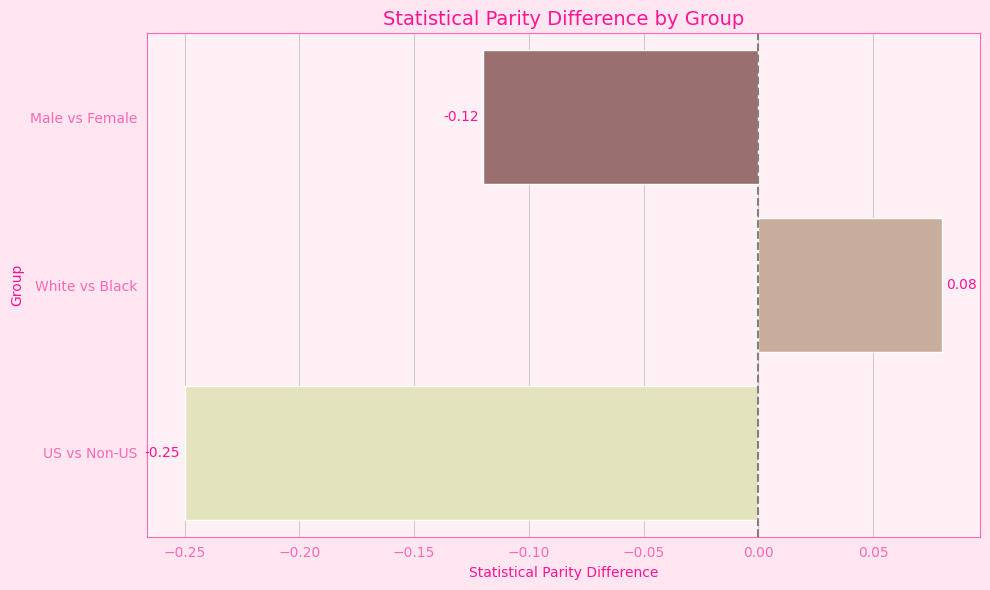

In [20]:
spd_results = {
    'Male vs Female': -0.12,
    'White vs Black': 0.08,
    'US vs Non-US': -0.25
}

plot_statistical_parity(spd_results)


# ID Plot

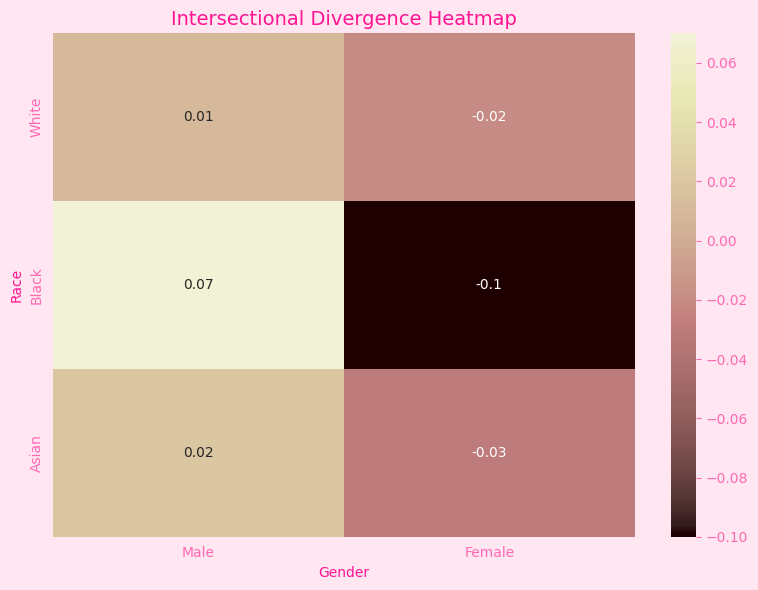

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data as a matrix
data = {
    'Male': {'White': 0.01, 'Black': 0.07, 'Asian': 0.02},
    'Female': {'White': -0.02, 'Black': -0.10, 'Asian': -0.03}
}
df_heat = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.heatmap(df_heat, annot=True, cmap='pink', center=0)
plt.title("Intersectional Divergence Heatmap", fontsize=14, color='#ff1493')
plt.xlabel("Gender")
plt.ylabel("Race")
plt.tight_layout()
plt.show()
